In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.utils import resample

In [2]:
df = pd.read_hdf('DSI-7.hdf')

In [3]:
df

,case,test,window,seizure,F3-C3,F4-C4,C3-P3,C4-P4,elapsed time,cpu usage,memory usage
0,chb01,0,0,False,5.974126,5.781400,5.512350,5.415369,5.143914,96.9,1651286016
0,chb01,0,1,False,5.935654,6.027476,5.688999,5.589532,4.289692,96.8,1446494208
0,chb01,0,2,False,5.834751,5.881431,5.701357,5.635897,4.453572,97.4,1447256064
0,chb01,0,3,False,5.888986,5.671197,5.355293,5.566865,4.317407,98.0,1446875136
0,chb01,0,4,False,6.203580,6.146401,5.713649,5.799418,4.254425,97.2,1443860480
...,...,...,...,...,...,...,...,...,...,...,...
0,chb06,0,1887,False,6.072874,5.987919,5.773504,5.655213,5.903025,97.5,2447396864
0,chb06,0,1888,False,5.257771,5.911709,5.755586,6.216934,5.867011,98.1,2447388672
0,chb06,0,1889,False,6.042252,6.223809,6.194151,6.234995,5.979837,98.7,2445914112
0,chb06,0,1890,False,5.745051,6.169761,5.197697,6.393366,5.963451,98.5,2447585280


In [4]:
predictors = df[['F3-C3', 'F4-C4','C3-P3','C4-P4']]

In [5]:
targets = df.seizure

In [6]:
#Creación de la muestra de entrenamiento y de test, tanto para las variables de predictores (canales) y la variables objetivo (seizure), siendo un test del 50%
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)

In [7]:
df_train=pd.concat([pred_train, tar_train],axis=1)

In [8]:
df_majority_train = df_train[df_train.seizure==False]
df_minority_train = df_train[df_train.seizure==True]

In [9]:
df_minority_upsampled_train = resample(df_minority_train, 
                                 replace=True,  
                                 n_samples=len(df_majority_train),
                                 random_state=123) 

In [10]:
df_upsampled_train = pd.concat([df_majority_train, df_minority_upsampled_train])

In [11]:
classifier=RandomForestClassifier(n_estimators=25) #Indicar el número de arboles en este caso 25

In [12]:
classifier=classifier.fit(df_upsampled_train[['F3-C3', 'F4-C4','C3-P3','C4-P4']],df_upsampled_train.seizure) #Construir el modelo con los datos de entrenamiento

In [13]:
predictions=classifier.predict(pred_test)

In [14]:
sklearn.metrics.confusion_matrix(tar_test,predictions) #Matriz de confusión de las predicciones para el grupo de test

array([[7466,   41],
       [ 101,   20]], dtype=int64)

In [15]:
print(sklearn.metrics.classification_report(tar_test,predictions))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99      7507
        True       0.33      0.17      0.22       121

    accuracy                           0.98      7628
   macro avg       0.66      0.58      0.61      7628
weighted avg       0.98      0.98      0.98      7628



In [16]:
model = ExtraTreesClassifier() #obtener la importancia de cada variable

In [17]:
model.fit(pred_train,tar_train) #Ajustar el modelo

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [18]:
print(model.feature_importances_) # Imprimir la importancia de cada variable (Columna de los canales)

[0.2572184  0.24960169 0.26934925 0.22383065]


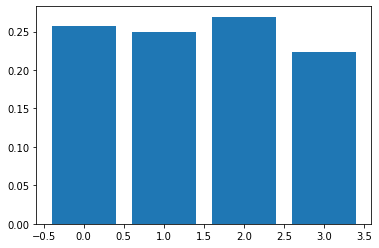

In [19]:
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show() #Dibujar las variables con su respectiva importancia

In [20]:
trees=range(25)
accuracy=np.zeros(25)

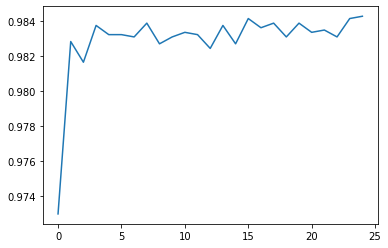

In [21]:
for idx in range(len(trees)):
    classifier=RandomForestClassifier(n_estimators=idx + 1)
    classifier=classifier.fit(pred_train,tar_train)
    predictions=classifier.predict(pred_test)
    accuracy[idx]=sklearn.metrics.accuracy_score(tar_test, predictions)
plt.cla()
plt.plot(trees, accuracy)